In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tqdm import tqdm
from scipy import linalg

In [2]:
df = pd.read_csv('PCA_iris_data', header=None)

In [3]:
X = df.loc[:,:3]
y = df.loc[:,4]

In [4]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)

In [5]:
encoder = LabelEncoder()
encoder.fit(y)
y_encoded = encoder.transform(y)
y_encoded = pd.DataFrame(y_encoded)

In [6]:
xi = np.array(X_scaled)
xi_T = xi.transpose()

In [7]:
C = np.matmul(xi,xi_T)/df.shape[0]

In [8]:
U, S, VT = np.linalg.svd(C, full_matrices=False)

In [9]:
Sd = np.diag(S)

''

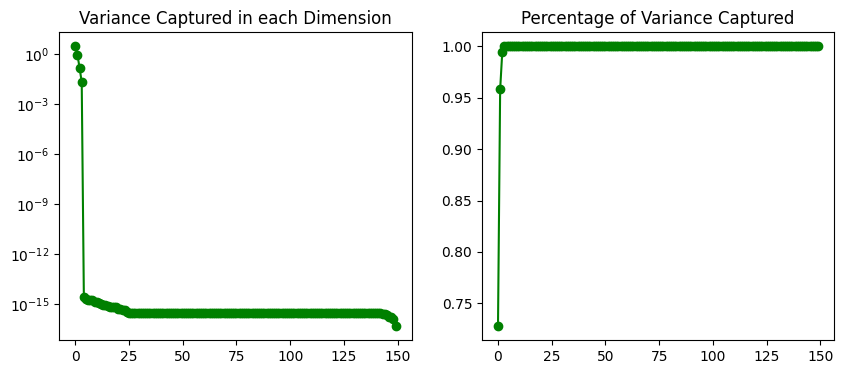

In [10]:
fig1 = plt.figure(figsize=(10,4))
ax1 = fig1.add_subplot(121)
ax1.semilogy(S, '-o', color='g')
ax1.set_title('Variance Captured in each Dimension')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S), '-o', color='g')
ax2.set_title('Percentage of Variance Captured')
;

In [11]:
T = U @ Sd

# 2 Dimension PCA

''

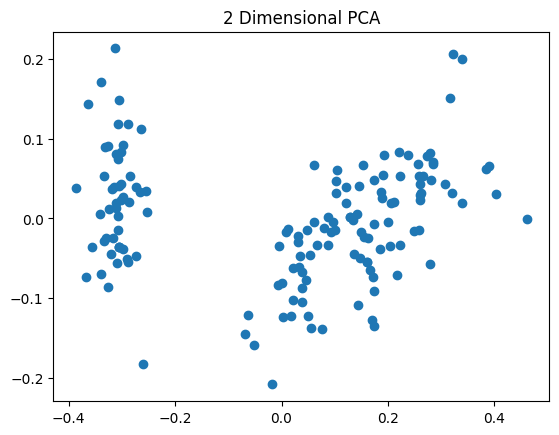

In [15]:
plt.scatter(T[:,0], T[:,1])
plt.title('2 Dimensional PCA')
;

# 3 Dimensional PCA

''

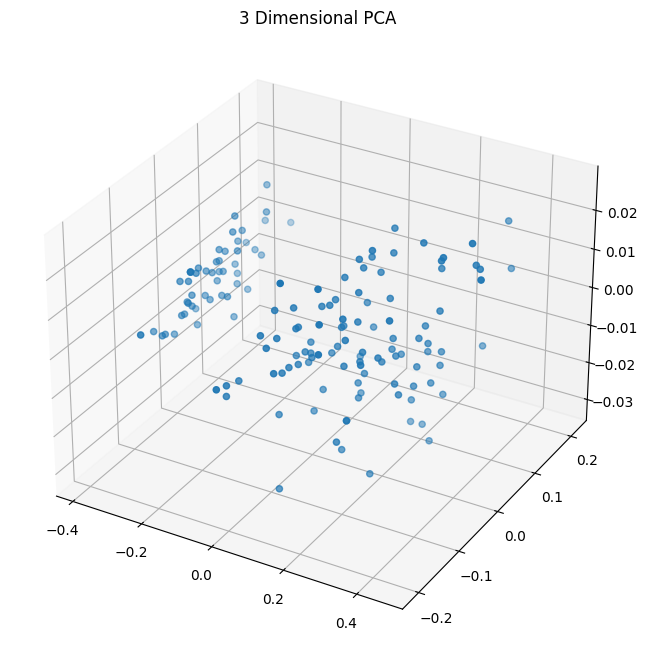

In [47]:
fig2 = plt.figure(figsize=(10,8))
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(T[:,0], T[:,1], T[:,2])
ax.set_title('3 Dimensional PCA')
;